---
Topic: `A Community-based Real-Time Service Delivery Sentiment Analyser.`

Date: `2022/05/13`

Programming Language: `python`

Main: `Natural Language Processing (NLP)`

---

### Introduction
Sentiment analyis (SA) is a supervised or unsupervised machine learning task for classifying the popularity of a given text. Given a text and labels a model can be trained to classify the category the text belongs to for example it can classify wether a given text fall under `positive`, `negative` or `neutral`. SA can be either a multi-class classification or a binary classification task.

### Abstract
Sentiment analyisis is a very useful study in modern technology. SA goal is to study human opinion over written text of natural languages. Natural languages are languages that are spoken by people, unlike programming language natural languages comes natural for example Xhosa, English, French etc. SA can analyise human emotions, attitude, opinion, sentiments over a written language. This study is very useful in systems like chatbots and virtual assistance in making decisions when interacting with human beings.


_In this notebook I'm going to implement and train a model from scratch using modern python libraries such as `tensorflow` by `google` that does a general sentiment analyisis classification task based on `3` class labels (`positive`, `negative`, `neutral`). Each code cell that we are going to execute will be explained by the use of `Markdown` that's why I choose `.ipyb` or `IPython` notebook to write code for model training.The dataset that i will be using for this supervised matchine learning task is called [Twitter US Airline Sentiment](https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment) and was downloaded from [kaggle](https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment). The processing and loading of data will be done step by step in this notebook so that it can be easily understood and can be explained easily in simple terms._

### Keywords
Natural Language Processing (NLP), Embeddings, Loss, Accuracy, Sentiment Analysis, Long Short Term Memory (LSTM), Dropout, Gated Reccurent Unit (GRU), Bi-Directional, Dataset, Overfitting, Confusion Matrix, Inference.


### Cloud File System
This notebook is an instance of a cloud notebook (Google Colab) notbook where we can write code in the browser without installing any packages or any programming language. Alternatively one can use `Jupyter Notebooks` to perform this task but for speed we may consider using something like `Google Colab` because it offers free `Graphic Processing Units (GPU)` and `Tensor Processing Unit (TPU)`. These devices or runtime environments allows our code to execute fast because they are good when it comes to mathematical computations as compared to `Central Processing Units (CPU)`

When you are using `Google Colab` you might as well think of accessing your file system. Fortunate enough google made it easy for developers because there's an `API` that allows us to directly link our `Google Drive` cloud storage with `Google Colab`. Also most of the datascientists use the API like `Kaggle` to access the dataset without bothering uploading the dataset in the google drive storage. The following shows how our file system looks like in the google drive.

```
📁 drive
  📁 My Drive
    📁 Service Delivery
       - keys.json
       - clean_tweets.csv
      📁 glove.6B
        - glove.6B.100d.txt
    
```
> Note that the `clean_tweets.csv` contains our dataset with cleaned paired to their labels and was obtained in the prevoius notebook. 

We also have a file called `glove.6B.100d.txt` will look at it later on.

### Where can i download `glove.6B.100d.txt`?
You can download the pretrained word vectors at [](http://nlp.stanford.edu/data/glove.6B.zip) as a zip file. Alternatively you can run the following command:

```shell
!wget http://nlp.stanford.edu/data/glove.6B.zip

# unzip the files
!unzip glove*.zip
```

### Phyiscal Devices
As i mentioned before that we are going to make use of free `GPU` we need to make sure that the change the runtime type by clicking on the `Runtime` menu > `Change Runtime Type` > `GPU`

### Mounting the Drive
In order to use the google drive in google colab we have to mount it and give google colab access to our google drive storage. We can mount the drive by running the following code cell.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Path to our files
In the following code cell we are going to define the paths to our files. We are going to make use of the `os` built in python module to manage our paths.

In [2]:
import os

base_path = '/content/drive/My Drive/Service Delivery'

assert os.path.exists(base_path), f"Path '{base_path}' does not exists."

# path to our csv file
data_path = os.path.join(base_path, 'clean_tweets.csv')
assert os.path.exists(data_path), f"Path '{data_path}' does not exists."

# path to word embedding vectors
embedding_path = os.path.join(base_path, 'glove.6B', 'glove.6B.100d.txt')
assert os.path.exists(embedding_path), f"Path '{embedding_path}' does not exists."


### Basic module imports

Ofcause we are going to import and probably install other modules later on in this notebook but in the following notebook we are going to import the basic modules that we are going to use in this notebook. 

The major modules that we are going to use that are not built-ins in python are as follows.

1. `tensorflow` - for working with `tensors`
2. `keras` - embedded in tensorflow version `2.*.*` allows us to build deep leaning module, layers or models easily using the `Sequential`, `Functional` and or `Sub Classing` API
3. `matplotlib.pyplot` - for visualizing interms of graphs
4. `prettytable` - provide an api for nice visualization of tables
5. `pandas` - for working with dataframes
6. `sklearn` - offers some classes and functions that helps us to easily work with `2d` or `1d` data for example we can use the `tran_test_split` method from `sklearn` model selection to split examples into subsets.
7. `nltk` - stands for `natural language tool kit` an nlp module that offers us with some functions such as `word_tokenize` for tokenizing a sentence into a list or array of words. 
8. `numpy` - numerical python, this package allows us to simply work with arrays very easily in python. Good news is that tensorflow keras can also work with these arrays directly instead of tensorflow tensors.
9. `spacy` - spaCy is a free open-source library for Natural Language Processing in Python.
10. `seaborn` - this package is used to do some colorful chats visualizations

> Note that other packages that i did not mention here will be explained as we go, that's the reason i chose interactive notebook over writting this code in an code editor.

In [3]:
import os
import time
import random
import math
import nltk
import json
import spacy
import re

import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import wordcloud as wc

from prettytable import PrettyTable
from matplotlib import pyplot as plt
from prettytable import PrettyTable
from collections import Counter
from tensorflow import keras
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
from google.colab import files, drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

nltk.download("punkt")
nltk.download("words")
spacy.cli.download('en_core_web_sm') # english language model read more: https://spacy.io/models

tf.__version__, keras.__version__

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


('2.8.2', '2.8.0')

### Seed

In the following code cell we are going to set a `seed` for random reproducivity. In datascience we share code, so inoder to get the same output when running the same code at different times we need to set the seed to all random actions that we are going to make. In the following code cell i will set the seed to `42` for random reproducivity. Note that this seed can be any integer number you want. Changing this seed may result in changing results at the end.

In [4]:
SEED = 42

np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

### Physical Device 

As i stated earlier on that we need to have access to physical devices such as `GPU` or `TPU` so that executing mathematical computations becomes time efficient. We are going to make use of a `GPU` by setting memory growth in tensorflow.


In [5]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    print("✔ GPU set")
  except RuntimeError as e:
    print(e)
else:
  print("No GPU's found")

1 Physical GPUs, 1 Logical GPUs
✔ GPU set


### Data
Our `clean_tweets.csv` file contains rows of examples where we will find text paired to their sentiment labels. In this section i will expain line by line data processing pipeline starting from loading a `.csv` file using pandas and visualizing and checking examples. Note that our dataset contains three labels which will be programmatically shown in code cells that will come after we load our data in a datafram using `pandas`.


### Creating a dataframe
In the following code cell we are going to load the dataset using the `pandas` module which we have imported with alias `pd` in a dataframe. We are going to use the `read_csv` function from pandas to read the `coma-seperated-values` data from our file as follows:

In [6]:
dataframe = pd.read_csv(data_path)

### Checking the first `10` rows of the dataframe

In pandas the method `head(n)` on a dataframe instance allows us to check the first `n` rows and the method `tail(n)` allows us to check the last `n` rows of the data in the dataframe. We want to check the first `10` rows so that we will be familiar with how our `data` looks like before doing any preprocessing on features and labels.

In [7]:
dataframe.head(10)

,Unnamed: 0,id,created_at,username,text,label,categorical_label
0,0,1547579068781998083,Thu Jul 14 13:49:37 +0000 2022,vivek49276338,i want to place one order delivery courier shi...,neutral,0
1,1,1547579038197108737,Thu Jul 14 13:49:29 +0000 2022,henryki29684325,your delivery service is ducking and unreliabl...,negative,1
2,2,1547578977325158401,Thu Jul 14 13:49:15 +0000 2022,earifin_com,exclusive gift pack make your one feel differe...,positive,2
3,3,1547578768448884740,Thu Jul 14 13:48:25 +0000 2022,deAndrento,actually we should expect in the future alread...,positive,2
4,4,1547578665822593029,Thu Jul 14 13:48:01 +0000 2022,MatthewJRoth,_z you only pay the at the delivery of your ca...,positive,2
5,5,1547578506283913217,Thu Jul 14 13:47:23 +0000 2022,ERadiators,read our latest review great customer service ...,positive,2
6,6,1547578433789915137,Thu Jul 14 13:47:05 +0000 2022,flipkartsupport,sorry about that we understand your concern ab...,negative,1
7,7,1547578268529729537,Thu Jul 14 13:46:26 +0000 2022,col_fox,out visiting the rope access and wash reach wi...,positive,2
8,8,1547578177500852225,Thu Jul 14 13:46:04 +0000 2022,SparrowCareers,are you looking for a career where you contrib...,neutral,0
9,9,1547578161436577792,Thu Jul 14 13:46:00 +0000 2022,RoadsAgency,to strengthen with role in the mining sector w...,neutral,0


### Our dataframe

Based on the dataframe that we have we are only intrested in two columns which are:

1. `airline_sentiment` - values are `positive`, `negative` and `nuetral`
2. `text` - this is the actual tweet text.


### Counting examples

In the following code cell we are going to visualize how many unique `airline_sentiment` (which is our target value ) values are there in our dataframe. We are going to use the `seaborn` module taht was imported earlier with an alias `sns`. In this module we will found a method called `countplot` which will plot all the total count aganist the `target` name as follows:

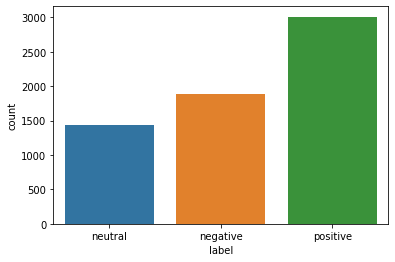

In [8]:
sns.countplot(x="label", data=dataframe)
plt.show()

### Observesion

From the above we can be able to see that there are more positive sentiments in this dataset. This brings us to a conclusion that the dataset has unbalanced labels and there's a high posibility that our model will overfit for positive sentiments. But we are going to make use of Natural Language Processing (NLP) techniquies to avoid this rather than balancing the labels.


### Null columns.

Our dataset is a dataset that was created using scrapping with the twitter API. There's high posibility that we have `null` values or `na` values on other columns. The first rule that we should do when working with pandas dataframes to to drop `na` values. In the following code cell we are going to check if we have `na` valued in our dataframe.

In [9]:
## Checking if there are 'na' valued in the dataframe
dataframe.isna().any()

Unnamed: 0           False
id                   False
created_at           False
username             False
text                 False
label                False
categorical_label    False
dtype: bool

> We can see and conclude that there are no `na` values in our dataset.

Next we are going to check if there are `null` values in our dataframe.

In [10]:
dataframe.isnull().any()

Unnamed: 0           False
id                   False
created_at           False
username             False
text                 False
label                False
categorical_label    False
dtype: bool

> As we can see that we also don't have a column with null values in our dataset. If it happened that you have null values in your dataset especially on the collumns that you are working with you will need to drop them for example using the code that says:

```py
dataframe = dataframe.dropna()
```
> note that a pandas method on a datafram `dropna` does not perform action in place so that's why we are re-assigning the dataframe.

But since we don't have `null` values and `na` values for the columns that we are intrested in we can skip this process because this process will trim our dataset.

This is the first thing datascientist do before working with dataframes in pandas.


### Features and labels

In this dataset we are interested in predicting the sentiment weather it's `positive` , `neutral` or `negative` based on the text. So based on the data that we have we are interested in two columns:

1. categorical_label
- Target values which is (`1`, `0`, `2`) as  (`negative`, `nuetral`, `positive`) respectively.

2. text
- This is the text that is matched to a certain target. (`positive`, `nuetral`, `negative`)

We are going to extract features(text) and labels(targets) into numpy array and do some preprocessing on them. The preprocessing steps will be expained line by line.

### Labels

Our target values are already numeric so we don't need to do anything as we preprocess them in the previous notebook.

In [11]:
targets = dataframe.categorical_label.values

Checking the first and last `3` target values

In [12]:
targets[:3], targets[-3:]

(array([0, 1, 2]), array([0, 1, 0]))

### Features (text)

In the previous notebook we cleaned our text, so theres nothing that we are going for text cleaning on our features.


In [13]:
texts = dataframe.text.values

In [14]:
texts[:3]

array(['i want to place one order delivery courier shipment to me but status mark day please help me courier service no courier head is talking to me and no',
       'your delivery service is ducking and unreliable rod the worst reputation',
       'exclusive gift pack make your one feel difference to order this high quality gift pack please visit the following link cash on delivery service is available all over the country'],
      dtype=object)

### Balancing Dataset

In the following code cell we are going to try to balance our class labels, as we saw in the visualization that our `positive` sentiments are more than others we are going to try to balance them with at least the `negative` sentiments. The reason i didn't want to balance all the `3` target values is that, i'm afraid we will trim more examples and the dataset will be very small.


We will start by counting how may negative labels do we have in the following code cell.

In [15]:
negative_label = 1
negative_count = list(targets).count(negative_label)
negative_count

1884

Based on this negative count value we are going to create a new variable called dataset that will store a newly created dataset with positive and negative labels balanced.

In [16]:
dataset = list()
positive_count = 0
for feature, label in zip(texts, targets):
  if label == 0 or label == 1:
    # neutral and negative add
    dataset.append([feature, label])
  else:
    # balance the positive and negative labels (positive)
    if negative_count == positive_count:
      continue
    else:
      positive_count += 1
      dataset.append([feature, label])

### Extracting balanced Features and labels.

Balanced features and labels will be extracted in the following code cell. But before we do that we can shuffle them, just to make sure that labels shuffled and nice.

In [17]:
random.shuffle(dataset)

In [18]:
features = list()
labels = list()

for (feature, label) in dataset:
  features.append(feature)
  labels.append(label)


# check just to make sure features and labels has the same length

assert len(features) == len(labels), f"Features and labels must have the same length recieved {len(features)} and {len(labels)}."

### Checking the most common words

In the following code cell we are going to use `wordcloud` package that we have imported with an alias `wc` and check the most appearing word in our dataset.

In [19]:
full_text = " ".join(features)

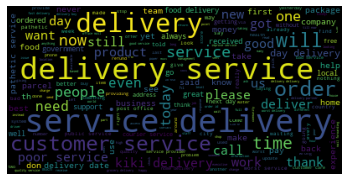

In [20]:
wordcloud = wc.WordCloud().generate(full_text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

As we can see that the most appearing word in our corpus is `"service delivery"` which is the parameter of interest of our study.

### Generating sets.
In machine learning (supervised machine learning) when creating models we need to have three sets of data which are:

1. training
2. validation
3. testing

The train set is used to train the model so that it will learn the mathematical mapping or relationship between features and labels. These features and labels must be at some point be converted to numerical values.

The validation set is the same as the test set but it's just that the validation set is used during model training and it is used to measure how accurate our model is becoming interms of metrics such as loss, accuracy, etc. Theoretically the validation set must come from a fraction of the train dataset but with test set transformation. The reason is being that the validation set must represent the test dataset as much as posible.

The testing set is the one that will completely measure how our model has learn the mappings between labels and features. In this set we wouldn't want our model to know about it inorder for us to have unbiased metric representation. I will explain later on more about this during model evaluation and model inference.

> Note that in this notebook our validation data will come from the `train` examples.

We are going to use the `train_test_split` method from `sklearn.model_selection` to split our dataset into different subsets. Note that we are going to set the `random_state` to our `SEED` for reproducivity and this also allows us to shuffle examples in our dataset. We don't want a case where we will have about `~10` negative reviews that follows each other they should be mixed so that our model won't overfit. We will explain more about the overfit part later on.

In [21]:
train_text, test_text, train_labels, test_labels = train_test_split(
    features, labels, random_state=SEED, test_size= .1
)

#  the validation set should come from the train examples
train_text, val_text, train_labels, val_labels  = train_test_split(
    train_text, train_labels, random_state=SEED, test_size= .01
)

### Counting and visualizing examples

In this section we are going to do data visualisation in terms of plots and tables. We are going to count examples for each subset and then we will the visualize by the use of a table. Another thing that we can do is to count and visualize how the `labels` are distributed in terms of number in each set. So we will count how many examples are in each set and visualize them using a bar graph.


The following helper function `tabulate` use `PrettyTable` class to tabulate examples in each set.

In [22]:
def tabulate(column_names, data, title):
  table = PrettyTable(column_names)
  table.title= title
  table.align[column_names[0]] = 'l'
  table.align[column_names[1]] = 'r'
  table.align[column_names[2]] = 'r'
  table.align[column_names[3]] = 'r'
  table.align[column_names[3]] = 'r'
  for row in data:
    table.add_row(row)
  print(table)

In [23]:
tabulate([
    "Set", "Total", "Neutral(0)", "Negative(1)", "Positive(2)"
],[
   ("training", len(train_labels), list(train_labels).count(0), list(train_labels).count(1), list(train_labels).count(2)),
    ("testing", len(test_labels), list(test_labels).count(0), list(test_labels).count(1), list(test_labels).count(2)),
    ("validation", len(val_labels), list(val_labels).count(0), list(val_labels).count(1), list(val_labels).count(2)),
   ("total", len(labels), list(labels).count(0), list(labels).count(1), list(labels).count(2)),
], "Counting examples in the subset(s).")

+-------------------------------------------------------------+
|             Counting examples in the subset(s).             |
+------------+-------+------------+-------------+-------------+
| Set        | Total | Neutral(0) | Negative(1) | Positive(2) |
+------------+-------+------------+-------------+-------------+
| training   |  4642 |       1285 |        1675 |     1682    |
| testing    |   521 |        142 |         193 |     186     |
| validation |    47 |         15 |          16 |      16     |
| total      |  5210 |       1442 |        1884 |     1884    |
+------------+-------+------------+-------------+-------------+


### Preparing Features(texts) and Labels(labels) for model training.

In deep learning/machine learning model does not take in raw data such as text. We need to convert text to a sequence of integer representation and have a word to index lookup for a word to an integer also known as a `vocabulary`. Our labels will be processed based on the loss function that we are going to use.

> _Note that this is a simple multi-class label clasification because we have 3 target labels (positive, negative, neutral). The best loss function to use for this supervised machine leaning task is `CategoricalCrossEntropy`. `CategoricalCrossEntropy` is flexible to use and it can work for both 2 class labels or multiclass labels (`dense`) since our labels are not `sparse`._

In tensorflow/keras there are a lot of loss function that you can read more about them [here.](https://www.tensorflow.org/api_docs/python/tf/keras/losses). The most common loss functions for classification tasks are:

1. [`BinaryCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy)

* This loss function compute the cross-entropy loss between true labels and predicted values. Note that the labels must be integer numbers. These loss only works when we have binary labels `0` or `1` meaning the label must be that label or the other one (True or False). For example `positive` or `negative`. This is not a good loss function for our task because we have only `3` labels, positive, nuetral and nagative.


2. [`CategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryFocalCrossentropy)

* I call this loss function flexible. This can either work on sparse labels or binary labels irespective of efficiency. This is a good fit to our task.  Categorical Cross entropy Loss function compute the entropy loss between real labels and predicted labels. This loss function as the name suggest it is used on categorical labels. A good use case is  when you have more that two class labels or when your class labels are `dense`.  In our case we are predicting 3 sentiments weather the text is `positive` , `neutral`or `negative` so we can use this loss function. The rules are very simple when working with this loss function in `tensorflow.keras`. It expects the labels to be `one_hot` encoded.

* One hot encoding can be defined as the essential process of converting the categorical data variables to be provided to machine and deep learning algorithms which in turn improve predictions as well as classification accuracy of a model. It is called `one_hot` because on a processed label, there will be a vector of `0's` where only the true label index will have a value of `1`. Not clear ok?? Let's have a look at our case where we have 2 classes (negative=1, neutral=1, positive=2) our class label will look as follows for:

* neutral
```py
[1. 0. 0.]  # only index 0 is hot which is our neutral label
```

* negative
```py
[0. 1. 0.]  # only index 1 is hot which is our -ve label
```
* positive
```py
[0. 0. 1.]  # only index 2 is hot which is our +ve label
```

> _During processing of our labels we will want to `one_hot` encode them as shown above_. 

We can use different method to do this task for example using the `sklearn` libary or using the `tf.one_hot()` function from tensorflow. But the one i like the most is to do it manualy using the `np.eye()` function which looks more proffesional to me.

3. [`SparseCategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy)

* This loss function is normally used on sparse data and it computes the crossentropy loss between true labels and predictions. Let's say we have `100` labels that we need to classify. In this case we can not use the `BinaryCrossentropy` loss function because this only works if we have two label outcome for example `True` or `False`, `Positive` or `Nagative`. Alternatively we can use the `CategoricalCrossentropy` loss but this loss function is not a good fit for the task because it expect the labels to be `one_hot` encoded vectors. So having a `100` dimension sparse vector will be a huge computation and it's not memory and time efficient for model training.

### Labels preprocessing

As we mentioned before our labels will be `one_hot` encoded. We are going to create a preprocessing function called `one_hot_encode`. This preprocessing function will be a lambda python function that takes in the label as an integer and returns a `one_hot_encoded` vector of that label. I'm going to make use of the `numpy.eye()` function to do this. 

In this `eye(n)` function we are going to pass the depth `n` which is the total number of labels that we have (0, 1).

In [24]:
depth = 3
one_hot_encode = lambda x: np.eye(depth)[x]

In the following code cell we are going to show the `one_hot_encoded` vector for a `neutral` review which has a label of `0` using our `one_hot_encode` preprocessing function

In [25]:
one_hot_encode(0)

array([1., 0., 0.])

In the following code cell we are going to show the `one_hot_encoded` vector for a `negative` review which has a label of `1` using our `one_hot_encode` preprocessing function

In [26]:
one_hot_encode(1)

array([0., 1., 0.])

In the following code cell we are going to show the `one_hot_encoded` vector for a `positive` review which has a label of `2` using our `one_hot_encode` preprocessing function

In [27]:
one_hot_encode(2)

array([0., 0., 1.])

Our training, validation and testing labels will then be transformed or preprocessed using the `one_hot_encode` function in the following code cell. Note that these are the labels that we will feed to our model during training, validation and testing. For transformation of these labels I'm going to make use of the numpy function called `apply_along_axis` and we apply this function along the first axis to get our transformed labels.

In [28]:
train_labels =  np.apply_along_axis(one_hot_encode, 0, train_labels)
val_labels =  np.apply_along_axis(one_hot_encode, 0, val_labels)
test_labels =  np.apply_along_axis(one_hot_encode, 0, test_labels)

### Feature Extraction

In deep learning, feature extraction is the process of transforming raw data into numerical features that can be processed while preserving the information in the original data set. In this section we are going to preprocess our text(features) so that we will get the numerical representation of our text. 

There are a lot of ways we can do to convert these sentences in sequence of numbers one of the common way of doing which is older is using something called `"The Bag Of Words"` which has some limmitations. In this case we are not going to use it. We are going to take advantage of our `keras` API which is easy to work with.

A sentence is just a sequence of words. So we need to break down these sequences of words or a sentence into a list of word with a process called tokenization. Tokenization is well known in NLP as nothing more than breaking down of a sentence or text into sequence/list/array of words. There are a lot of language models that can be used to tokenize the words, for example there are tokenizer model for english, germany, french, etc languages. Alternatively you can create your own tokenizer model by just using the `split(delimeter)` string function in python and pass the delimeter as a `space/(' ')`. In our case we are going to use the language model from spacy called `en_core_web_sm` we have already downloaded this language model at the top during importing modules. So our `tokenize` function will look as follows:

In [29]:
nlp = spacy.load('en_core_web_sm')
def tokenize(sent: str)->list:
  return [tok.text for tok in nlp.tokenizer(sent)]

In the following code cell we are going to check if our `tokenize` function working. So if we pass the `text` to our function we should get the list of words.

In [30]:
tokenize("This is service is not good.")

['This', 'is', 'service', 'is', 'not', 'good', '.']

### Creating a Vocabulary

I call this one the brain or memory of the model in NLP. A vocabulary is an index to word lookup. It is nothing but a python ordered dictionary with words as `keys` and `indices` as values. A vocabulary can look as follows:

```json
{"<pad>": 0, "<unk>": 1, "the": 2, "is": 3, .....}
```

Keras offers a `Tokenizer` class that is able to construct this `vocabulary` from fly using from `preprocessing.text`. But first we need to know the vocabulary size. The vocabulary size is nothing but the total number of unique words. The vocabulary size must always come from the train features in our case from `train_texts`.


In the following code cell with the help of `Counter` class from built in `collections` model we want to be able to count the number of unique words in the `train_texts` array. This total number of `unique` words will be our `vocab_size`.

In [31]:
counter = Counter()

for sent in train_text:
  counter.update(tokenize(str(sent)))

Our `counter` object is nothing than an `ordered python dictionary` that maps in keys as `unique` words and values as the `count` or the total occarance of that word in the `train_text`. So we can check the first common `10` words from this object by using the method called `most_common` as follows:

In [32]:
counter.most_common(10)

[('delivery', 5070),
 ('service', 4896),
 ('the', 4860),
 ('to', 3912),
 ('and', 3201),
 ('is', 2707),
 ('a', 2262),
 ('of', 2151),
 ('i', 2130),
 ('for', 1957)]

The `vocab_size` is the length of this counter object.

In [33]:
vocab_size = len(counter)
vocab_size

6275

Which means we have `~5k` unique words in our vocabulary. The idea behind text cleaning and converting text to common case is to reduce the size of this `vocabulary` so that our model will be able to train so fast.


### Tokenizer
As i mentioned before we need to create a `tokenizer` object that will learn the mappings between our words in the train features using the `Tokenizer` class from `keras.preprocessing.text`. In this `Tokenizer` we are going to pass the `num_words` keyword argument which is the `vocab_size` the total number of unique words in our `train_text`. Our `tokenizer` will learn these mappings using the method called `fit_on_texts` which accepts a list of `sentences` in our case `train_text`

In [34]:
tokenizer = keras.preprocessing.text.Tokenizer(
    num_words = vocab_size
)
tokenizer.fit_on_texts(train_text)

Our dictionary will be called `word_indices` which looks as follows:

```json
{"<pad>": 0, "<unk>": 1, "the": 2, "is": 3, .....}
```
Then we are also going to create a `word_indices_reversed` which is nothing but the reversed key and values vocabulary version.

```json
{ 0: "<pad>", 1: "<unk>", 2: "the", 3: "is", .....}
```

In [35]:
word_indices = tokenizer.word_index
word_indices_reversed = dict([(v, k) for (k, v) in word_indices.items()])

### Helper functions

We are going to create 2 helper functions that will be able to convert sequences of words to sequence of integers and sequence of integers to sequence of word. These helper functions are as follows:

1. `sequence_to_text`

This helper function will convert a sequence of integers to a sequence of text.

2. `text_to_sequence`

This helper function will convert the sequence of text to sequence of integers.

In [36]:
def sequence_to_text(sequences):
    return " ".join(word_indices_reversed[i] for i in sequences)
    
def text_to_sequence(sent):
  words = tokenize(sent.lower())
  sequences = list()
  for word in words:
    try:
      sequences.append(word_indices[word])
    except KeyError:
      sequences.append(0) # if the word is not in our dictionary we add a 0 to it
  return sequences

### Creating sequences

In the following code cell we are now going to create sequences for all or sets. We are going to use the `tokenizer` object specifically a method called `text_to_sequences()` which converts the list of sentences into sequences of integers. So we are going to do this for all our `3` sets.

In [37]:
train_sequence_tokens = tokenizer.texts_to_sequences(train_text)
test_sequence_tokens = tokenizer.texts_to_sequences(test_text)
val_sequence_tokens = tokenizer.texts_to_sequences(val_text)

Checking the `sequence_to_text` on a single train example

In [38]:
sequence_to_text(train_sequence_tokens[1])

'if your product is good it will eventually speak for itself your focus should be quality delivery and great after service'

Checking the `sequence_to_text` on a single test example

In [39]:
sequence_to_text(test_sequence_tokens[1])

'be like convenience fee service fee delivery fee fee tip fee peak hour your jack in the box meal will be in for'

Checking the `sequence_to_text` on a single validation example

In [40]:
sequence_to_text(val_sequence_tokens[1])

'integration bulk use our bulk integration service and send more from any application with unmatched delivery visit here'

### Padding sequences

These sequences contains different lengths. In theory and practically these sequence must be of the same `size` or `length`. The reason why these sequences are of different lengths it's because the sentences are of different lengths to begin with. So to make thes sentences or text have the same lengths, all the longer sentences must be `truncated` and all the shorter sentences must be `padded` with a value of `0`. So we need to define the `max_length` of our sentence so that the padding and truncating takes place to this common `length`. Fortunately we have a method called `pad_sequences` from `keras.preprocessing.sequence` that does that for us out of a fly. All we have to do is to pass the `maxlen` in our case will be the `max_length` value of `100` which means all the sequences must be of length `100`.

In the following code cell we are going to apply `padding` and `truncating` to our sequences. Padding or Truncating of these sequences can be either `post` or `pre`. If it is `post` padding then the zero's will be appended to the `right` of the sequence list and to the `left` otherwise. If it is `post` truncating then sequences are then going to be trimmed to the `right` and `left` otherwise.



In [41]:
max_words = 100
train_tokens_sequence_padded = keras.preprocessing.sequence.pad_sequences(
                                       train_sequence_tokens,
                                       maxlen=max_words,
                                       padding="post", 
                                       truncating="post"
                                       )
test_tokens_sequence_padded = keras.preprocessing.sequence.pad_sequences(
                                       test_sequence_tokens,
                                       maxlen=max_words,
                                       padding="post", 
                                       truncating="post"
                                       )
val_tokens_sequence_padded = keras.preprocessing.sequence.pad_sequences(
                                       val_sequence_tokens,
                                       maxlen=max_words,
                                       padding="post", 
                                       truncating="post"
                                       )

Now our features and labels are ready for model training we are now introducing a new important asspect in natural langauage processing which is nothing but.

### Word Embeddings
Embeddings transform a `one-hot` encoded vector (a vector that is 0 in elements except one, which is 1) into a much smaller dimension vector of real numbers. The `one-hot` encoded vector is also known as a `sparse vector`, whilst the real valued vector is known as a `dense vector`.

The key concept in these word embeddings is that words that appear in similar contexts appear nearby in the vector space, i.e. the **Euclidean distance** between these two word vectors is small. By context here, we mean the surrounding words. For example in the sentences `"I purchased some items at the shop"` and `"I purchased some items at the store"` the words `'shop'` and `'store'` appear in the same context and thus should be close together in vector space, this means that the **Euclidean distance** between the word `shop` and `store` is very small.

> If you want to read more about word embeddings you can visit this notebook [CrispenGari/pytorch-python](https://github.com/CrispenGari/pytorch-python/blob/main/09_NLP/02_Sentiment_Analyisis_Series/10_A_closer_look_on_Word_Embeddings.ipynb) for better understanding in theory.

If you are an expert in NLP you may have heard that `'woman'` added to the vector of `'king'` minus the vector of `'man'` give us `'queen'`. 

### Why does this work?

If we think about it, the vector calculated from `'king'` minus `'man'` gives us a `"royalty vector"`. This is the vector associated with traveling from a man to his royal counterpart, a king. If we add this `"royality vector"` to `'woman'`, this should travel to her royal equivalent, which is a `queen`! 

For better understanding of this consept visit the notebook that I've referenced.

### Glove Word Vectors

We are going to load the `Glove.6B.100d.txt` file as our pretrained word vectors. As the name suggested these vectors was trained with `~6B` words and has `100` dimension vectors. `GloVe` vectors are available in `50`, `100`, `200` and `300` dimensions. There is also a `42B` and `840B` glove vectors, however they are only available at `300` dimensions.

### Why are we even loading Word vectors in our model?

We want to create a general purpose sentment analyizer model that will be able to classify sentiments accurately. These pretrained word embeddings gives us a super power so that our model can easily learn the mappings between labels and features within a short period of time with only few epochs.


In the following code cell we are going to load the `embedding` vectors from a txt file into an embedding dictionary.

In [42]:
embeddings_dictionary = dict()
with open(embedding_path, encoding='utf8') as glove_file:
  for line in glove_file:
    records = line.split()
    word  = records[0]
    vectors = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vectors

Next we are going to create the embedding matrix that suits our data.

In [43]:
embedding_matrix = np.zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
  vector = embeddings_dictionary.get(word)
  if vector is not None:
    try:
      embedding_matrix[index] = vector
    except:
      pass

Now that we have our data ready for model creation and that we have our embedding weights ready to be used next we are going to build a classification model using `tensorflow.keras`

### Model

Our model will be a very simple classification model. There are three ways of building a model in tensorflow keras. These ways are:

1. Sequential API
2. Functional API
3. Sub Class API

In this Notebook we are going to use the `SubClass` API the reason i choose this method over other methods it's because of it's flexibility when building deep learning models in `tesnorflow`.

In this notebook we are going to create a `Bi-Directional RNN` model for text classification. I'm not going to explain the mathematical theory that much in this presentation but you can read more about what the input shape does `RNN` (Recurrent Nueral Networks) accepts [CrispenGari/pytorch-python](https://github.com/CrispenGari/pytorch-python/blob/main/09_NLP/02_Sentiment_Analyisis_Series/01_Simple_Sentiment_Analysis.ipynb).

### Why Recurrent Nueral Networks (RNN)
These are nothing but layers that comes from the `keras.Layers` which are commonly used and seems to be good in processing `sequential` data. These layers are used mostly in `audio` processing, `time-series` or `text-sequences`. These layers are a good fit to our case because we are working with sequential data.

We are going to make use of an `RNN` achitecture called `Long Short Term Memory (LSTM)`


### Why is an LSTM better than a standard RNN? 

Standard `RNNs` suffer from the vanishing gradient problem. `LSTMs` overcome this by having an extra recurrent state called a `cell`, which can be thought of as the "memory" of the LSTM and the use use multiple gates which control the flow of information into and out of the memory. If you want to know the mathematics or clear explanation about these layers you can read them here [CrispenGari/pytorch-python](https://github.com/CrispenGari/pytorch-python/blob/main/09_NLP/02_Sentiment_Analyisis_Series/02_Updated_Sentiment_Analysis.ipynb).

### Bidirectional `LSTM`.

The concept behind a bidirectional RNN is simple. As well as having an RNN processing the words in the sentence from the first to the last (a forward RNN), we have a second RNN processing the words in the sentence from the last to the first (a backward RNN). In our model we are going to have a  Gated Reccurrent Unit (GRU) as our backward RNN and an LSTM as our forward RNN.


### Regularization
Without going into overfitting into too much detail, the more parameters you have in in your model, the higher the probability that your model will overfit (memorize the training data, causing a low training error but high validation/testing error, i.e. poor generalization to new, unseen examples). To combat this, we use regularization. More specifically, we use a method of regularization called dropout. 

`Dropout` works by randomly dropping out (setting to 0) neurons in a layer during a forward pass. The probability that each neuron is dropped out is set by a hyperparameter and each neuron with dropout applied is considered indepenently. One theory about why dropout works is that a model with parameters dropped out can be seen as a "weaker" (less parameters) model. The predictions from all these "weaker" models (one for each forward pass) get averaged together withinin the parameters of the model. Thus, your one model can be thought of as an ensemble of weaker models, none of which are over-parameterized and thus should not overfit.


Our model clas will be called `SentimentClassifier` and it is implemented in the following code cell.



In [44]:
class SentimentClassifier(keras.Model):
  def __init__(self, n_output, dropout=.5):
    super(SentimentClassifier, self).__init__()

    # layers for bidirectional
    forward_layer = keras.layers.GRU(
      128, return_sequences=True, dropout=dropout,
      name="gru_forward_layer"
    )
    backward_layer = keras.layers.LSTM(
      128, return_sequences=True, dropout=dropout,
      go_backwards=True, name="lstm_backward_layer"
    )
    self.embedding = keras.layers.Embedding(
          vocab_size, 100, 
          input_length=max_words,
          weights=[embedding_matrix], 
          trainable=True,
          name = "embedding_layer"
    )
    self.bidirectional = keras.layers.Bidirectional(
        forward_layer,
        backward_layer = backward_layer,
        name= "bidirectional_layer"
    )
    self.dropout = keras.layers.Dropout(dropout)
    self.flatten = keras.layers.Flatten(
          name="flatten"
    )
    self.fc_1 = keras.layers.Dense(n_output, activation='softmax', name="output_layer")

  def call(self, tensor):
    x = self.embedding(tensor)
    x = self.bidirectional(self.dropout(x))
    x = self.flatten(self.dropout(x))
    out = self.fc_1(self.dropout(x))
    return out

In [45]:
sentiment_classifier = SentimentClassifier(n_output=3)
sentiment_classifier.build((None, 100))
sentiment_classifier.summary()

Model: "sentiment_classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_layer (Embedding)  multiple                 627500    
                                                                 
 bidirectional_layer (Bidire  multiple                 205568    
 ctional)                                                        
                                                                 
 dropout (Dropout)           multiple                  0         
                                                                 
 flatten (Flatten)           multiple                  0         
                                                                 
 output_layer (Dense)        multiple                  76803     
                                                                 
Total params: 909,871
Trainable params: 909,871
Non-trainable params: 0
________________________________________

### Callbacks
In the following code cell we are going to define our callbacks. Callbacks helps ua to control or monitor our model during training. You can read more about them in the [Keras Docummentation on Callbacks](https://keras.io/api/callbacks/).


We are also going to compile our model. We are using the `CategoricalCrossentropy` as our loss function, as mentioned before. The reason why we are passing `from_logits=False` it's because in the output layer of the model we are using `softmax` activation function. For the training metrics we are going to visualize the `accuracy` and for the optimizer we are going to use the `Adam` with the default parameters. You can try different optimizer for your back propagation algorithm but adams seems to produce better results in most cases.

In [46]:
early_stoping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=5,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
)

sentiment_classifier.compile(
    loss =  keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy'],
    optimizer = keras.optimizers.Adam()
)

### Training Loop

In the following code cell we are going to train our model. We are going to call the `fit` method on our model. For the training data we are going to use the batch_size of `128` and for the validation set we are going to half the batch_size.

In [47]:
BATCH_SIZE = 128
EPOCHS = 20

history = sentiment_classifier.fit(
    x = train_tokens_sequence_padded,
    y = train_labels,
    epochs = EPOCHS,
    verbose = 1,
    shuffle=True,
    batch_size= BATCH_SIZE,
    validation_data=(val_tokens_sequence_padded, val_labels),
    validation_batch_size = BATCH_SIZE//2,
    callbacks =[early_stoping]
)

Epoch 1/20
37/37 [==============================] - 18s 94ms/step - loss: 1.0621 - accuracy: 0.4657 - val_loss: 1.0584 - val_accuracy: 0.5106
Epoch 2/20
37/37 [==============================] - 1s 33ms/step - loss: 0.9973 - accuracy: 0.5259 - val_loss: 0.9095 - val_accuracy: 0.5957
Epoch 3/20
37/37 [==============================] - 1s 37ms/step - loss: 0.9595 - accuracy: 0.5493 - val_loss: 0.8820 - val_accuracy: 0.6383
Epoch 4/20
37/37 [==============================] - 1s 28ms/step - loss: 0.9313 - accuracy: 0.5748 - val_loss: 0.8252 - val_accuracy: 0.6596
Epoch 5/20
37/37 [==============================] - 1s 20ms/step - loss: 0.8766 - accuracy: 0.6060 - val_loss: 0.8143 - val_accuracy: 0.7021
Epoch 6/20
37/37 [==============================] - 1s 20ms/step - loss: 0.8532 - accuracy: 0.6258 - val_loss: 0.8976 - val_accuracy: 0.6170
Epoch 7/20
37/37 [==============================] - 1s 20ms/step - loss: 0.7898 - accuracy: 0.6564 - val_loss: 0.7618 - val_accuracy: 0.7021
Epoch 8/20
3

### Visualizing training metrics

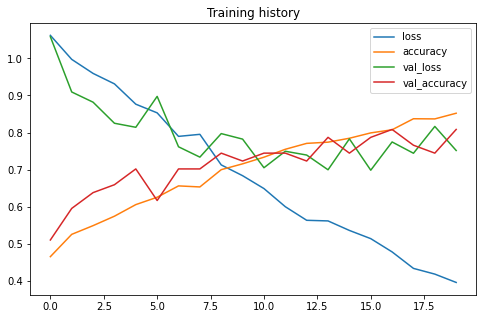

In [48]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.title("Training history")
plt.xlabel = "Epoch(s)"
plt.ylabel = "loss/accuracy"
plt.show()

### Model evaluation

In the following code cell we are going to evaluate our model. Note that the model evaluation in machine learning is done on the test dataset. The test dataset is the dataset that the model has never seen during training. The reason for us doing this it's because we don't want false metrics to fool us while the model will not perform well during inference.


So we are going to use our `test_tokens_padded` and our `test_labels` to do model evaluation.

In [49]:
sentiment_classifier.evaluate(
    x = test_tokens_sequence_padded,
    y = test_labels,
    verbose=1, batch_size=BATCH_SIZE//2
)

9/9 [==============================] - 0s 8ms/step - loss: 0.5241 - accuracy: 0.8119


[0.5240583419799805, 0.8119001984596252]

### Model Inference

In this section we are going to make predictions using our model. During model inference we are going to do the same feature processing as we did during model training. These feature processing will include something like:

1. converting our text to lower case (and maybe do text cleaning)
2. tokenize our text into list of words (note that we need to use the same tokenization function that we used before)
3. we going to convert our text to sequence of intergers
4. we will then pad these sequence to the size that we used during training.
5. then finally we will call the `predict` function on our model.


The following functions was used during text cleaning from the previous notebook, so we are redefining them in this notebook so that we can reuse them again.


In [50]:
def decontracted(phrase:str)->str:
    """
    Args:
        phrase (str): takes in a word like I'm

    Returns:
        string: a decontracted word like I am
    """
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [51]:
def clean_sentence(sent:str)->str:

    """
    Args:
        sent (str): an uncleaned sentence with text, punctuations, numbers and non-english words
    Returns:
        str: returns a cleaned sentence with only english words in it.
    """
    sent = sent.lower() # converting the text to lower case
    sent = re.sub(r'(@|#)([A-Za-z0-9]+)', ' ', sent) # removing tags and mentions (there's no right way of doing it with regular expression but this will try)
    sent = re.sub(r"([A-Za-z0-9]+[.-_])*[A-Za-z0-9]+@[A-Za-z0-9-]+(\.[A-Z|a-z]{2,})+", " ", sent) # removing emails
    sent = re.sub(r'https?\S+', ' ', sent, flags=re.MULTILINE) # removing url's
    sent = re.sub(r'\d', ' ', sent) # removing none word characters
    sent = re.sub(r'[^\w\s\']', ' ', sent) # removing punctuations except for "'" in words like I'm
    sent = re.sub(r'\s+', ' ', sent).strip() # remove more than one space
    words = list()
    eng = set(nltk.corpus.words.words())
    for word in sent.split(' '):
        words.append(decontracted(word)) # replace word's like "i'm -> i am"
    return " ".join(w for w in words if w.lower() in eng or not w.isalpha()) # removing non-english words
    

### The predict function.
In the predict function we are going to make predictions on a given text sentence and return the following response.

```json
{
  "class_label": "neutral",
  "label": 0,
  "predictions": [
    {"class_label": "neutral", "label": 0, "probability": 0.86},
    {"class_label": "negative", "label": 1, "probability": 0.04},
    {"class_label": "positive", "label": 2, "probability": 0.1}
   ],
  "probability": 0.86,
  "sentence": "this is a sentiment"
}
```

In the following code cell we are going to define our classes or class name.

In [52]:
classes = np.array(["neutral", 'negative', "positive"])

### Data Types

This is not necessary but it is a good practice when coding. We want to create a datatye that matches our prediction response.

In [53]:
class Prediction:
  def __init__(self, class_label: str, label: int, probability: float):
    self.class_label = class_label
    self.label = label
    self.probability = probability
  
  def __str__(self) -> str:
      return f"Prediction <{self.class_label}>"

  def __repr__(self) -> str:
      return f"Prediction <{self.class_label}>"

class PredictionResponse:
  def __init__(self, class_label: str, label: int, predictions: list, probability:float, sentence: str):
    self.class_label = class_label
    self.label = label
    self.predictions = predictions
    self.probability = probability
    self.sentence = sentence

  def __str__(self) -> str:
    return f"Prediction Response <{self.class_label}>"

  def __repr__(self) -> str:
    return f"Prediction Response <{self.class_label}>"

In the following code cell we are going to create a `make_prediction` function, this function takes in the `model` and the `text` sentence.

In [54]:
def make_prediction(model, text: str):
  text = clean_sentence(text)
  tokens = tokenize(text)
  tokens = tokenizer.texts_to_sequences([text])
  tokens = keras.preprocessing.sequence.pad_sequences(
                                       tokens,
                                       maxlen=max_words,
                                       padding="post", 
                                       truncating="post"
                                       )
  
  probabilities = np.squeeze(model.predict(tokens))
  top_pred = np.argmax(probabilities, axis=0)

  all_preds = [
      Prediction(classes[i], i, float(np.round(probabilities[i], 2))) for i, _ in enumerate(probabilities)
  ]

  return PredictionResponse(classes[top_pred],top_pred, all_preds, float(np.round(probabilities[top_pred], 2)), text)

### Nuetral Prediction

In [55]:
make_prediction(sentiment_classifier, 'i want to place one order delivery courier shipment to me but status mark day please help me courier service no courier head is talking to me and no')

Prediction Response <neutral>

### Negative Prediction

In [56]:
make_prediction(sentiment_classifier, 'your delivery service is ducking and unreliable rod the worst reputation')

Prediction Response <negative>

### Positive Prediction

In [57]:
make_prediction(sentiment_classifier, 'exclusive gift pack make your one feel difference to order this high quality gift pack please visit the following link cash on delivery service is available all over the country')

Prediction Response <positive>

### User Input

We can allow users to give us the text and then make predictions on their text. In the following code cell we are going to allow users to give us their input and make predictions based on their input text.


In [58]:
while True:
  text = input("Enter a tweet review (q) to quit:\n")
  if text.lower() == "q":
    break
  prediction = make_prediction(sentiment_classifier, text)

  print()
  print("text: ", prediction.sentence)
  print("label: ", prediction.label)
  print("class label: ", prediction.class_label)
  print("probability: ", prediction.probability)
  print()
  print("*" * 90)
  print()


Enter a tweet review (q) to quit:
your delivery service is ducking and unreliable rod the worst reputation

text:  your delivery service is ducking and unreliable rod the worst reputation
label:  1
class label:  negative
probability:  1.0

******************************************************************************************

Enter a tweet review (q) to quit:
q


### Saving and Loading

There a a lot of ways of saving keras models, we are going to use the one called Model Serelization, which involves the saving of the whole model with `model.save(path)` file.

In [59]:
model_path = 'sentiment_classifier'

sentiment_classifier.save(model_path, save_format='tf')
print("Model Saved.")

INFO:tensorflow:Assets written to: sentiment_classifier/assets


INFO:tensorflow:Assets written to: sentiment_classifier/assets


Model Saved.


Now to load the model we use the `keras.models.load_model(path)` function.

In [60]:
loaded_model = keras.models.load_model(model_path)

loaded_model.evaluate(
    x = test_tokens_sequence_padded,
    y = test_labels,
    verbose=1, batch_size=BATCH_SIZE//2
)

9/9 [==============================] - 1s 10ms/step - loss: 0.5241 - accuracy: 0.8119


[0.5240583419799805, 0.8119001984596252]

### Model Metrics Evaluations

In this section we are going to evaluate our model metrics based our test dataset. Classification models can be evaluated using:

1. classification reports
2. confusion matrix
3. accuracy
4. loss

We have already saw the accuracy of our model, next we are gong to show the classification report of our model. We will need real labels and predicted labels, in the following code cell we are going to get the predicted labels in from the test examples.

In [61]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import itertools

In [62]:
y_preds = np.argmax(np.squeeze(sentiment_classifier.predict(test_tokens_sequence_padded)), 1)
y = np.argmax(test_labels, axis=1)

# checking if predictions length are the same as real_labels length

assert len(y_preds) == len(y), f"The predicted labels and real labels must have the same length, but got {len(y_preds)} and {len(y)}."

In the following code cell we are going to display a classification report for our test dataset.

In [63]:
cr = classification_report(y, y_preds, output_dict=False, labels=y, target_names =[classes[i] for i in y])
print(cr)

              precision    recall  f1-score   support

    positive       0.86      0.76      0.81       186
     neutral       0.68      0.93      0.79       142
    negative       0.92      0.77      0.84       193
    negative       0.92      0.77      0.84       193
    positive       0.86      0.76      0.81       186
    negative       0.92      0.77      0.84       193
    positive       0.86      0.76      0.81       186
     neutral       0.68      0.93      0.79       142
    negative       0.92      0.77      0.84       193
    positive       0.86      0.76      0.81       186
    positive       0.86      0.76      0.81       186
    positive       0.86      0.76      0.81       186
     neutral       0.68      0.93      0.79       142
    positive       0.86      0.76      0.81       186
    positive       0.86      0.76      0.81       186
    negative       0.92      0.77      0.84       193
    negative       0.92      0.77      0.84       193
    positive       0.86    

In the following code cell we are going to create a function that plots a simple confusion matrix for our actual test labels vrs our predicted labels.

In [64]:
def plot_confusion_matrix(labels:list=[], pred_labels:list =[], classes:list=[]):
  fig = plt.figure(figsize = (10, 10))
  ax = fig.add_subplot(1, 1, 1)
  cm = confusion_matrix(labels, pred_labels)

  if len(classes) == 0:
    classes = labels.numpy()

  cm = ConfusionMatrixDisplay(cm, display_labels= classes)
  cm.plot(values_format = 'd', cmap = 'Blues', ax = ax)
  plt.xticks(rotation = 0, color="black", fontsize=10)
  plt.yticks(rotation = 0, color="black", fontsize=10)

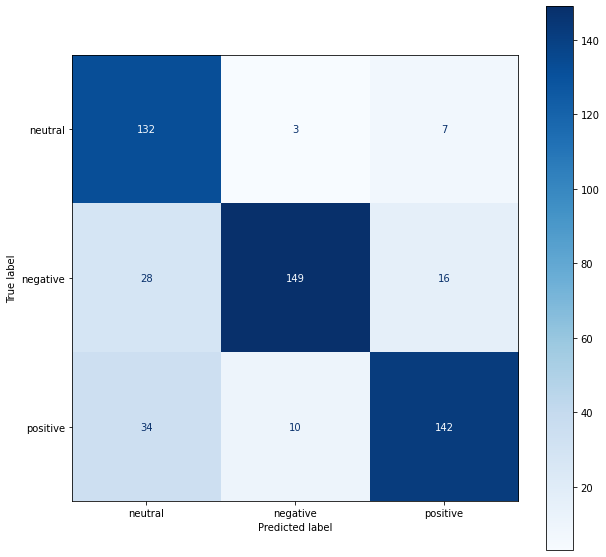

In [65]:
plot_confusion_matrix(y, y_preds, classes)

In the following code cell we are going to create another, `plot_confusion_matrix` function that will display the percenatage on how the model is being confused in classifying our class labels.

In [66]:
def plot_confusion_matrix(y_true, y_pred, classes=None, figsize=(5, 5), text_size=20):
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    n_classes = cm.shape[0]

    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    if len(classes):
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes),
         xticklabels=labels,
         yticklabels=labels,
          )
    ax.yaxis.label.set_color('green')
    ax.xaxis.label.set_color('green')


    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    threshold = (cm.max() + cm.min()) / 2.
    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black",
                 size=text_size)

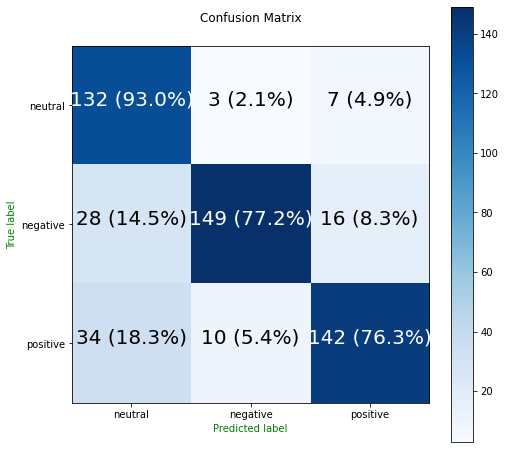

In [67]:

plot_confusion_matrix(y, y_preds, classes=classes, figsize=(8, 8))

### Downloading the Model

To download the model from google colab we do it as follows:


In [ ]:
from google.colab import files
files.download(model_path)

### Additional Resources

1. [paperswithcode.com](https://paperswithcode.com/task/sentiment-analysis)